In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(123)

In [3]:
!wget 'https://covid.ourworldindata.org/data/owid-covid-data.csv' -O 'COVID_world.csv'

--2022-09-17 15:30:45--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.138, 104.21.233.137, 2606:4700:3038::6815:e989, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘COVID_world.csv’

COVID_world.csv         [   <=>              ]  58.71M   112MB/s    in 0.5s    

2022-09-17 15:30:46 (112 MB/s) - ‘COVID_world.csv’ saved [61557821]



In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [5]:
#Leemos el data set de COVID con Pandas
dataCovid = pd.read_csv('COVID_world.csv')

In [6]:
#Observamos los 10 primeros registros el dataframe
dataCovid[:10]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
#observamos los paises que estan en el dataframe
dataCovid['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

#Buscamos los paises que analizaremos

In [8]:
posDataMO = dataCovid['location'].str.contains('Morocco')
dataCovidMO = dataCovid[posDataMO]
dataCovidMO[:-5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131635,MAR,Africa,Morocco,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,47.1,NaN,1.1,76.68,0.686,NaN,NaN,NaN,NaN
131636,MAR,Africa,Morocco,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,47.1,NaN,1.1,76.68,0.686,NaN,NaN,NaN,NaN
131637,MAR,Africa,Morocco,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,47.1,NaN,1.1,76.68,0.686,NaN,NaN,NaN,NaN
131638,MAR,Africa,Morocco,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,47.1,NaN,1.1,76.68,0.686,NaN,NaN,NaN,NaN
131639,MAR,Africa,Morocco,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,47.1,NaN,1.1,76.68,0.686,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132578,MAR,Africa,Morocco,2022-09-07,1264597.0,17.0,23.143,16275.0,1.0,0.286,...,0.8,47.1,NaN,1.1,76.68,0.686,NaN,NaN,NaN,NaN
132579,MAR,Africa,Morocco,2022-09-08,1264609.0,12.0,20.143,16275.0,0.0,0.286,...,0.8,47.1,NaN,1.1,76.68,0.686,NaN,NaN,NaN,NaN
132580,MAR,Africa,Morocco,2022-09-09,1264622.0,13.0,18.143,16275.0,0.0,0.143,...,0.8,47.1,NaN,1.1,76.68,0.686,NaN,NaN,NaN,NaN
132581,MAR,Africa,Morocco,2022-09-10,1264648.0,26.0,16.714,16276.0,1.0,0.286,...,0.8,47.1,NaN,1.1,76.68,0.686,NaN,NaN,NaN,NaN


In [9]:
fecha_MO = dataCovidMO['date']
N_MO = np.shape(np.ravel(fecha_MO))
N_MO= N_MO[0]
x_MO = np.linspace(0, N_MO, N_MO) 
new_cases_MO =  dataCovidMO['new_cases']
new_deaths_MO = dataCovidMO['new_deaths']
new_cases_smooth_MO =  dataCovidMO['new_cases_smoothed']
new_deaths_smooth_MO =  dataCovidMO['new_deaths_smoothed']
new_deaths_per_millon_MO = dataCovidMO['new_deaths_per_million']
new_cases_per_millon_MO = dataCovidMO['new_cases_per_million']

In [ ]:
print(new_deaths_MO.max())

127.0


Text(0.5, 1.0, 'New Deaths per Million')

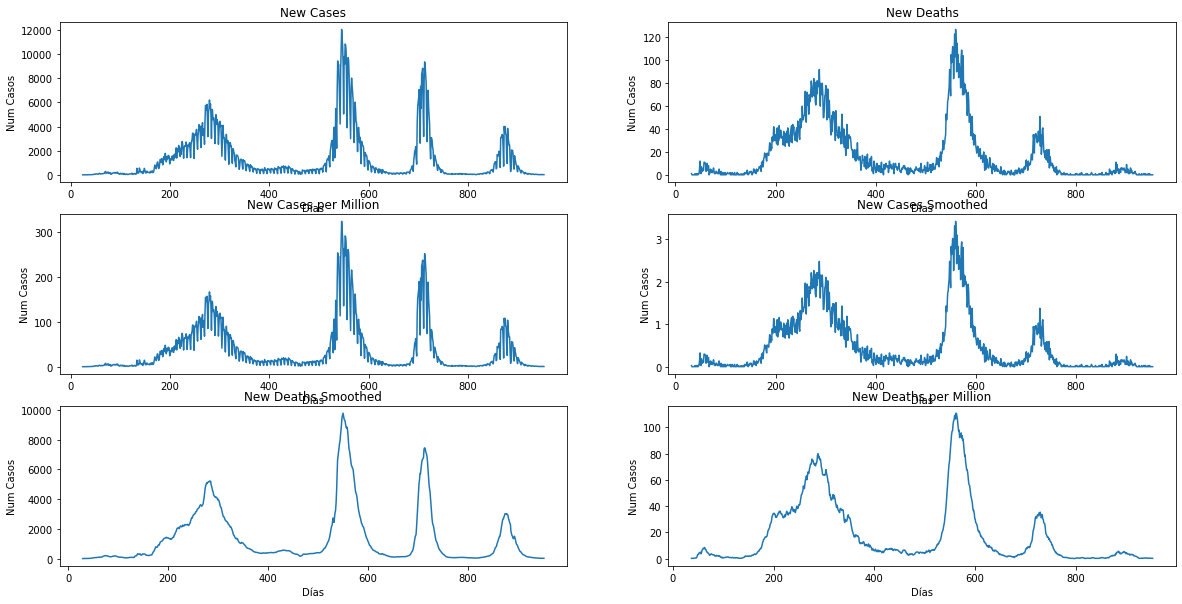

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(3, 2, 1),plt.plot(x_MO, new_cases_MO)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Cases')
plt.subplot(3, 2, 2),plt.plot(x_MO, new_deaths_MO)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Deaths')
plt.subplot(3, 2, 3),plt.plot(x_MO, new_cases_per_millon_MO)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Cases per Million')
plt.subplot(3, 2, 4),plt.plot(x_MO, new_deaths_per_millon_MO)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Cases Smoothed')
plt.subplot(3, 2, 5),plt.plot(x_MO, new_cases_smooth_MO)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Deaths Smoothed')
plt.subplot(3, 2, 6),plt.plot(x_MO, new_deaths_smooth_MO)
plt.xlabel('Días')
plt.ylabel('Num Casos')
plt.title('New Deaths per Million')

In [11]:
from ipywidgets import interact
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [12]:
def polyFBase(obs, M):
  idx = np.linspace(0, M-1, M)
  phi_x = np.power(obs, idx)
  return phi_x

def expFBase(obs, M):
  mu_s = np.linspace(0, 951, M) 
  s2 = 0.5
  phi_x = np.zeros_like(mu_s)
  for m in range(0, len(mu_s)):
    phi_x[m] = np.exp(-((obs-mu_s[m])**2)/(2*s2))
  phi_x[0] = 1.
  return phi_x

def sigmoidalFBase(obs, M):
  mu_s = np.linspace(0, 951, M)
  s = 0.5
  phi_x = np.zeros_like(mu_s)
  for m in range(0, len(mu_s)):
    phi_x[m] = 1/(1+(np.exp(-((obs-mu_s[m])) / s)))
  phi_x[0] = 1.
  return phi_x

In [13]:
def matixPHIDesing(x_vect, M, fbase):
  N = len(x_vect)
  mPHI = np.zeros((N, M))
  for n in range(0, N):
    x_n = x_vect[n]
    if fbase == 'poly':
      vectPhi_xn = polyFBase(x_n, M)
    if fbase == 'exp':
      vectPhi_xn = expFBase(x_n, M)
    if fbase == 'sig':
      vectPhi_xn = sigmoidalFBase(x_n, M)
    mPHI[n,:] = vectPhi_xn
  return mPHI

In [14]:
t_MO = dataCovidMO['new_cases']
aux_MO = np.isnan(t_MO)
pos_MO = np.where(aux_MO==True)
t_MO.iloc[pos_MO[0]] = 0
aux_MO = np.isnan(t_MO)
pos_MO = np.where(aux_MO==True)
print(pos_MO)

(array([], dtype=int64),)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
@interact(TipoCaso = ["new_cases", "new_deaths", "new_deaths_per_million", "new_cases_per_million", "new_cases_smoothed", "new_deaths_smoothed"], numFBase = (3, 2000, 2), tipoFBase = ["exp", "poly", "sig"], flagRegularize = [True, False], regParam = (0, 0.1, 0.001))
def get_dataCovid_MO(TipoCaso, numFBase, tipoFBase, flagRegularize, regParam):
  fecha_MO = dataCovidMO['date']
  x_MO = np.linspace(0, N_MO, N_MO)
  if TipoCaso == "new_cases":
    t_MO = dataCovidMO['new_cases']
  elif TipoCaso == "new_deaths":
    t_MO = dataCovidMO['new_deaths']
  elif TipoCaso == "new_deaths_per_million":
    t_MO = dataCovidMO['new_deaths_per_million']
  elif TipoCaso == "new_cases_per_million":
    t_MO = dataCovidMO['new_cases_per_million']
  elif TipoCaso == "new_cases_smoothed":
    t_MO = dataCovidMO['new_cases_smoothed']
  elif TipoCaso == "new_deaths_smoothed":
    t_MO = dataCovidMO['new_deaths_smoothed']
  
  aux_MO = np.isnan(t_MO)
  pos_MO = np.where(aux_MO==True)
  t_MO.iloc[pos_MO[0]] = 0.
  plt.plot(x_MO, t_MO)
  plt.title(TipoCaso)
  plt.show()

  x = np.squeeze(x_MO)
  maxX = np.max(x)
  maxX = 1.
  x = x/maxX
  t = np.squeeze(t_MO)
  N = len(x)
  tObs = t
  matPHI = matixPHIDesing(x, M=numFBase, fbase=tipoFBase)
  matPHIT = matPHI.T
  print('Dimn Mat PHI', matPHI.shape)

  if flagRegularize == True:
    print('Regularize OK')
    w_ml = np.linalg.inv(matPHIT.dot(matPHI)+regParam*np.eye(numFBase))@(matPHIT@tObs)
  else:
    print('Simple Reg')
    w_ml = np.linalg.inv(matPHIT.dot(matPHI))@(matPHIT@tObs)
  print(w_ml.shape)

  yEst = matPHI@w_ml

  plt.figure()
  plt.plot(x*maxX,tObs, '-b')
  plt.plot(x*maxX,yEst, '--r')
  plt.xlabel('x (obs)')
  plt.ylabel('t (etiquetas)')
  plt.legend(('t obs', 't estimado'))
  plt.show()

  aux = (tObs-yEst)
  error = 0.5*(aux.T)@aux
  r2 = r2_score(tObs, yEst)
  MAE = mean_absolute_error(tObs, yEst)
  print('Error de predicción RMS es:',error)
  print('Error de predicción R2 es:',r2)
  print('Error de predicción MAE es:',MAE)

  x_obs_new = np.linspace(800, 1000, 100)
  phi_vec_new = matixPHIDesing(x_obs_new, numFBase, tipoFBase)
  y_new_obs = phi_vec_new@w_ml

  plt.figure()
  plt.plot(x*maxX, tObs, '-b')
  plt.plot(x*maxX, yEst, '--r')
  plt.plot(x_obs_new*maxX, y_new_obs, 'dy')
  plt.xlabel('x (obs)')
  plt.ylabel('t (etiquetas)')
  plt.legend(('t obs', 't estimado'))



interactive(children=(Dropdown(description='TipoCaso', options=('new_cases', 'new_deaths', 'new_deaths_per_mil…

#Conclusiones de la regresión linenal en el país de Marruecos

# Nuevos casos

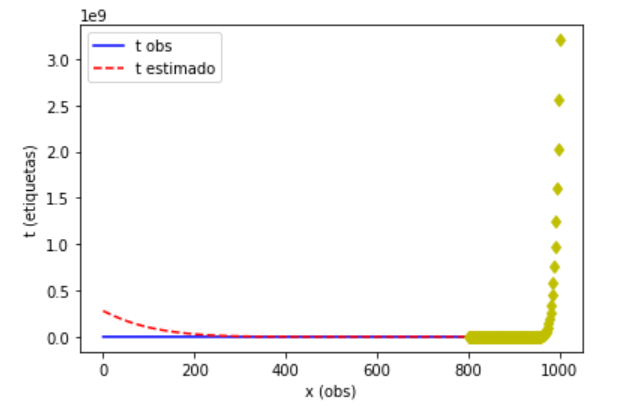

El límite de funciones base es de 52 en la función polinmial, para que no tienda a infinito aún si estar regularizado y sin regularizar.

---



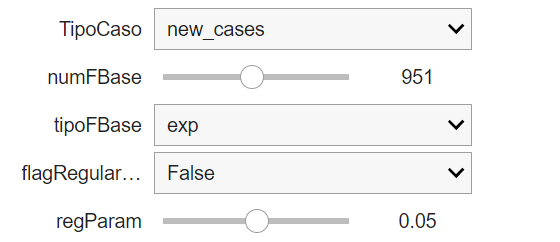

El límite de funciones base es de 951 en la función exponencial y sin regularización, para que no marque valores negativos o tienda a infinito.

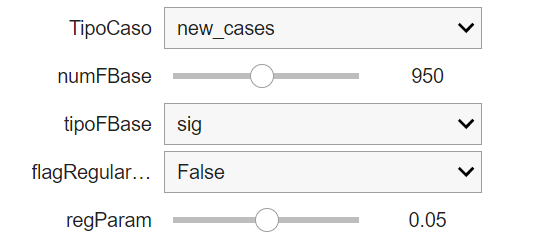

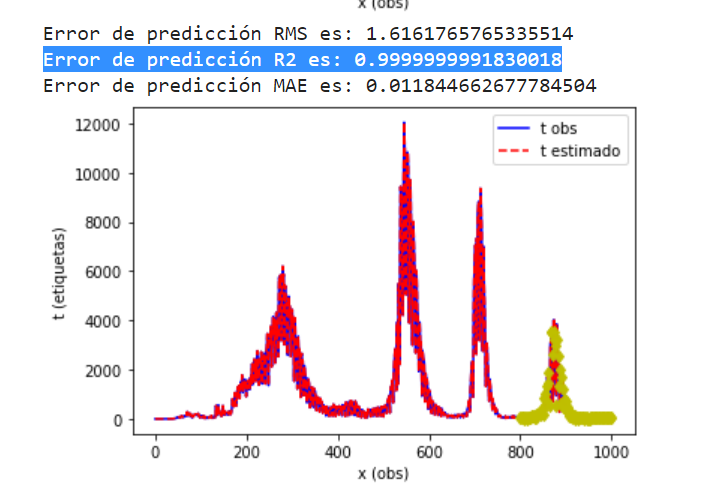

Para la función base con 952 casos nuevos y la sigmoidal la predicción es casi 1.

# Muertes por Millón

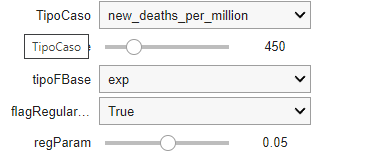
